In [4]:
import matplotlib.pyplot as plt
import csv
from datetime import datetime
from dateutil.parser import parse
import pandas as pd
import plotly.plotly as py
from plotly.graph_objs import *
import matplotlib
import csv
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.datasets import load_iris

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from sklearn import cross_validation
from sklearn import metrics
from sklearn import preprocessing
from sklearn import svm
from datetime import timedelta
import pandas as pd
%matplotlib inline

In [6]:
'''Read CSV file and set index to timestamp'''
df = pd.read_csv('karl8.csv',low_memory=False, parse_dates= ['Timestamp'])
df = df.set_index('Timestamp')

In [7]:
'''Scale state data to fall within within 0 and 1'''
df['ScaledStates'] = df['States'] / df['States'].max()
df.head()

,States,ScaledStates
Timestamp,,
2018-07-03 10:14:31,2964,0.476527
2018-07-03 10:15:56,3000,0.482315
2018-07-03 10:16:20,2970,0.477492
2018-07-03 10:16:49,2983,0.479582
2018-07-03 10:17:16,2975,0.478296


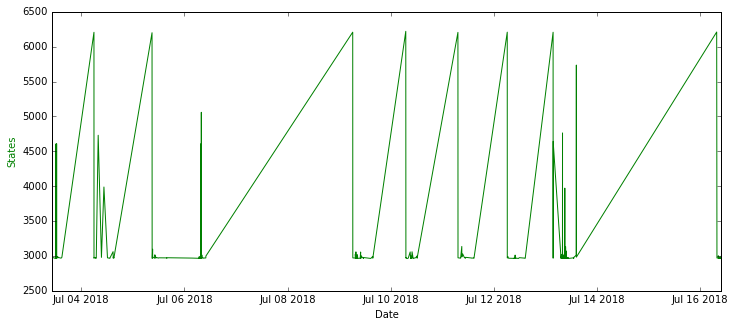

In [10]:
'''Visualization of raw data'''
fig, ax1 = plt.subplots()

#ax2 = ax1.twinx()
ax1.plot(df.index, df['States'], 'g-')
#ax2.plot(df.index, df['ScaledStates'], 'b-')

ax1.set_xlabel('Date')
ax1.set_ylabel('States', color='g')
#ax2.set_ylabel('ScaledStates', color='b')


plt.show()
plt.rcParams['figure.figsize'] = 12,5

NameError: name 'five_minutely_data' is not defined

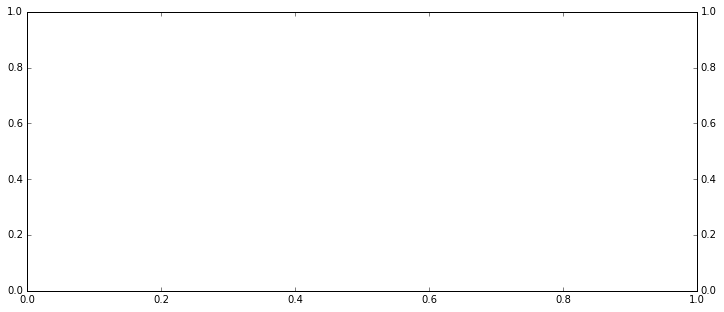

In [9]:
'''Visualization of every 60 sec data '''
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(five_minutely_data.index, five_minutely_data['States'], 'g-')
ax2.plot(five_minutely_data.index, five_minutely_data['ScaledStates'], 'b-')

ax1.set_xlabel('Date')
ax1.set_ylabel('States', color='g')
ax2.set_ylabel('ScaledStates', color='b')


plt.show()
plt.rcParams['figure.figsize'] = 12,5

In [78]:

'''Feature Extraction: Compute the mean, sum, and count for every 1 min'''
five_minutely_data = pd.DataFrame()
five_minutely_data['ScaledStatesSum'] = df.ScaledStates.resample('60s', how='sum')
five_minutely_data['ScaledStatesMean'] = df.ScaledStates.resample('60s', how='mean')
five_minutely_data['ScaledStatesCount'] = df.ScaledStates.resample('60s', how='count')


In [79]:
'''Replace all missing values with zero'''
five_minutely_data1 = pd.DataFrame()
five_minutely_data1 = five_minutely_data.replace(np.nan, 0)
five_minutely_data1.head()

,ScaledStatesSum,ScaledStatesMean,ScaledStatesCount
Timestamp,,,
2018-03-12 00:00:00,0,0,1
2018-03-12 00:01:00,0,0,0
2018-03-12 00:02:00,0,0,0
2018-03-12 00:03:00,0,0,0
2018-03-12 00:04:00,0,0,0


In [80]:
'''Labelling for one class'''
five_minutely_data1['target'] = 1
y_train = five_minutely_data1['target']  



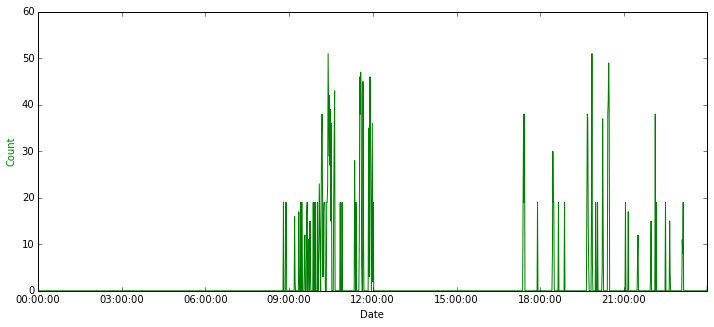

In [81]:
'''Visualization of every 60 sec data '''
fig, ax1 = plt.subplots()

#ax2 = ax1.twinx()
ax1.plot(five_minutely_data1.index, five_minutely_data1['ScaledStatesCount'], 'g-')
#ax2.plot(five_minutely_data1.index, five_minutely_data1['ScaledStatesSum'], 'b-')

ax1.set_xlabel('Date')
ax1.set_ylabel('Count', color='g')
#ax2.set_ylabel('Sum', color='b')


plt.show()
plt.rcParams['figure.figsize'] = 12,5

In [133]:
X = five_minutely_data1.drop('target', axis=1)

#X_test = five_minutely_data1.drop('target', axis=1)
model = svm.OneClassSVM(nu=0.02, kernel='rbf', gamma='auto') 
model.fit(X,y_train)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma='auto', kernel='rbf',
      max_iter=-1, nu=0.02, random_state=None, shrinking=True, tol=0.001,
      verbose=False)

/home/seggs/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



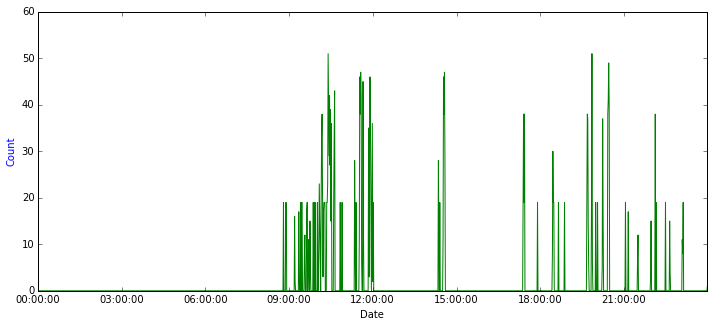

In [134]:
'''Read CSV file and set index to timestamp'''
df = pd.read_csv('orders12t.csv',low_memory=False, parse_dates= ['Timestamp'])
df = df.set_index('Timestamp')

'''Scale state data to fall within within 0 and 1'''
df['ScaledStates'] = df['States'] / df['States'].max()


'''Feature Extraction: Compute the mean, sum, and count for every 1 min'''
five_minutely_data = pd.DataFrame()
five_minutely_data['ScaledStatesSum'] = df.ScaledStates.resample('60s', how='sum')
five_minutely_data['ScaledStatesMean'] = df.ScaledStates.resample('60s', how='mean')
five_minutely_data['ScaledStatesCount'] = df.ScaledStates.resample('60s', how='count')

'''Replace all missing values with zero'''
five_minutely_data1 = pd.DataFrame()
five_minutely_data1 = five_minutely_data.replace(np.nan, 0)

'''Labelling for one class'''
five_minutely_data1['target'] = 1
dflist=pd.date_range('2018-03-12 14:20:00', '2018-03-12 14:36:00', freq='60s')
five_minutely_data1['target'][pd.DatetimeIndex(five_minutely_data1.index).isin(dflist)] = -1
y_test = five_minutely_data1['target']
X_test = five_minutely_data1.drop('target', axis=1)

'''Visualization of every 60 sec data '''
fig, ax1 = plt.subplots()

#ax2 = ax1.twinx()
ax1.plot(five_minutely_data1.index, five_minutely_data1['ScaledStatesCount'], 'g-')
#ax2.plot(five_minutely_data1.index, five_minutely_data1['ScaledStatesSum'], 'b-')

ax1.set_xlabel('Date')
ax1.set_ylabel('Count', color='b')
#ax2.set_ylabel('Sum', color='g')


plt.show()
plt.rcParams['figure.figsize'] = 12,5

In [135]:
y_pred_test = model.predict(X_test)
n_error_test = y_pred_test[y_pred_test == 1].size
print('Test error size:', n_error_test)



Test error size: 92


In [136]:

from sklearn import metrics  

targs = y_test
preds = y_pred_test

print("accuracy: ", metrics.accuracy_score(targs, preds))  
print("precision: ", metrics.precision_score(targs, preds))  
print("recall: ", metrics.recall_score(targs, preds))  
print("f1: ", metrics.f1_score(targs, preds))  
print("area under curve (auc): ", metrics.roc_auc_score(targs, preds))



accuracy:  0.0701388888889
precision:  0.95652173913
recall:  0.0618411806044
f1:  0.116171617162
area under curve (auc):  0.413273531479


In [137]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred_test))  
print(classification_report(y_test, y_pred_test)) 

[[  13    4]
 [1335   88]]
             precision    recall  f1-score   support

         -1       0.01      0.76      0.02        17
          1       0.96      0.06      0.12      1423

avg / total       0.95      0.07      0.12      1440



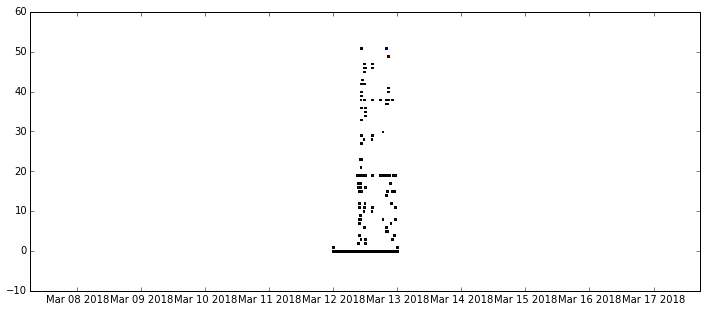

In [132]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(five_minutely_data1.index, five_minutely_data1['ScaledStatesCount'], s= 3, c=y_pred_test, marker = "s", label ='Test' )
plt.show()

In [ ]:
'''
Based on the metrics used above, poor statistics was achieved hence it will be proper to say that
One CLass SVM is a well known machine learning algorithm for novality detection,
but it is applicable only for a set of vectors not for time series data. 

'''